In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
sns.set()
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
sen = pd.read_csv('train.tsv', sep='\t', header=0)
sen.head()

,PhraseId,SentenceId,Phrase,Sentiment
0,1,1,A series of escapades demonstrating the adage ...,1
1,2,1,A series of escapades demonstrating the adage ...,2
2,3,1,A series,2
3,4,1,A,2
4,5,1,series,2


In [3]:
print ('Shape of the data set is:', sen.shape)

Shape of the data set is: (156060, 4)


In [4]:
sen.describe().T

,count,mean,std,min,25%,50%,75%,max
PhraseId,156060.0,78030.500000,45050.785842,1.0,39015.75,78030.5,117045.25,156060.0
SentenceId,156060.0,4079.732744,2502.764394,1.0,1861.75,4017.0,6244.00,8544.0
Sentiment,156060.0,2.063578,0.893832,0.0,2.00,2.0,3.00,4.0


#sen.Sentiment[sen.Sentiment == 0] = 'negative'
#sen.Sentiment[sen.Sentiment == 1] = 'somewhat negative'
#sen.Sentiment[sen.Sentiment == 2] = 'neutral'
#sen.Sentiment[sen.Sentiment == 3] = 'somewhat positive'
#sen.Sentiment[sen.Sentiment == 4] = 'positive'

In [5]:
### Checking Missing values in the Data Set and printing the Percentage for Missing Values for each Columns

count = sen.isnull().sum().sort_values(ascending=False)
percentage = ((sen.isnull().sum()/len(sen)*100)).sort_values(ascending=False)
missing_data = pd.concat([count, percentage], axis=1,
keys=['Count','Percentage'])

print('Count and percentage of missing values for the columns:')

missing_data

Count and percentage of missing values for the columns:


,Count,Percentage
Sentiment,0,0.0
Phrase,0,0.0
SentenceId,0,0.0
PhraseId,0,0.0


Percentage for default

2    50.99
3    21.10
1    17.48
4     5.90
0     4.53
Name: Sentiment, dtype: float64


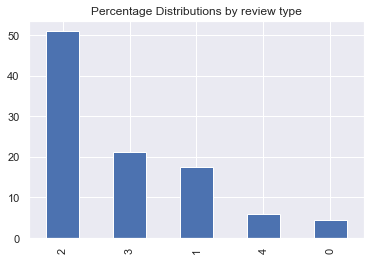

In [6]:
### Checking for the Distribution of Default
import matplotlib.pyplot as plt
%matplotlib inline
print('Percentage for default\n')
print(round(sen.Sentiment.value_counts(normalize=True)*100,2))
round(sen.Sentiment.value_counts(normalize=True)*100,2).plot(kind='bar')
plt.title('Percentage Distributions by review type')
plt.show()

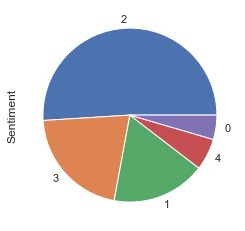

In [7]:
sen['Sentiment'].value_counts().plot.pie()

In [8]:
#Removing columns
sen.drop(columns = ['PhraseId', 'SentenceId'], inplace = True)
sen.head()

,Phrase,Sentiment
0,A series of escapades demonstrating the adage ...,1
1,A series of escapades demonstrating the adage ...,2
2,A series,2
3,A,2
4,series,2


In [9]:
# Apply first level cleaning
import re
import string

#This function converts to lower-case, removes square bracket, removes numbers and punctuation
def text_clean_1(text):
    text = text.lower()
    text = re.sub('\[.*?\]', '', text)
    text = re.sub('[%s]' % re.escape(string.punctuation), '', text)
    text = re.sub('\w*\d\w*', '', text)
    return text

cleaned1 = lambda x: text_clean_1(x)

In [10]:
# Let's take a look at the updated text
sen['Cleaned_Phrase'] = pd.DataFrame(sen.Phrase.apply(cleaned1))
sen.head(10)

,Phrase,Sentiment,Cleaned_Phrase
0,A series of escapades demonstrating the adage ...,1,a series of escapades demonstrating the adage ...
1,A series of escapades demonstrating the adage ...,2,a series of escapades demonstrating the adage ...
2,A series,2,a series
3,A,2,a
4,series,2,series
5,of escapades demonstrating the adage that what...,2,of escapades demonstrating the adage that what...
6,of,2,of
7,escapades demonstrating the adage that what is...,2,escapades demonstrating the adage that what is...
8,escapades,2,escapades
9,demonstrating the adage that what is good for ...,2,demonstrating the adage that what is good for ...


In [11]:
# Apply a second round of cleaning
def text_clean_2(text):
    text = re.sub('[‘’“”…]', '', text)
    text = re.sub('\n', '', text)
    return text

cleaned2 = lambda x: text_clean_2(x)

In [12]:
# Let's take a look at the updated text
sen['Cleaned_Phrase_new'] = pd.DataFrame(sen['Cleaned_Phrase'].apply(cleaned2))
sen.head(10)

,Phrase,Sentiment,Cleaned_Phrase,Cleaned_Phrase_new
0,A series of escapades demonstrating the adage ...,1,a series of escapades demonstrating the adage ...,a series of escapades demonstrating the adage ...
1,A series of escapades demonstrating the adage ...,2,a series of escapades demonstrating the adage ...,a series of escapades demonstrating the adage ...
2,A series,2,a series,a series
3,A,2,a,a
4,series,2,series,series
5,of escapades demonstrating the adage that what...,2,of escapades demonstrating the adage that what...,of escapades demonstrating the adage that what...
6,of,2,of,of
7,escapades demonstrating the adage that what is...,2,escapades demonstrating the adage that what is...,escapades demonstrating the adage that what is...
8,escapades,2,escapades,escapades
9,demonstrating the adage that what is good for ...,2,demonstrating the adage that what is good for ...,demonstrating the adage that what is good for ...


In [13]:
print(sen.isnull().sum())

Phrase                0
Sentiment             0
Cleaned_Phrase        0
Cleaned_Phrase_new    0
dtype: int64


In [14]:
X = sen ['Cleaned_Phrase_new']
y = sen ['Sentiment']

In [15]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=225)
print('Loading %d training sample and %d test sample. \n' %(X_train.shape[0],X_test.shape[0]))

Loading 124848 training sample and 31212 test sample. 



In [16]:
print ('X Train Data -->', X_train.shape)
print ('X Test Data -->', X_test.shape)
print ('Y Train Data -->',y_train.shape)
print ('Y Test Data -->',y_test.shape)

X Train Data --> (124848,)
X Test Data --> (31212,)
Y Train Data --> (124848,)
Y Test Data --> (31212,)


In [17]:
from sklearn.feature_extraction.text import CountVectorizer

In [18]:
#BoW
countvectr = CountVectorizer() #in scikit-learn
countvectr.fit(X_train)
print("Some Feature Names ", countvectr.get_feature_names()[:10])
print('='*50)

Total_counts_X = countvectr.transform(X_train)
print("Type of count vectorizer ",type(Total_counts_X))
print("Shape of out text BOW vectorizer ",Total_counts_X.get_shape())
print("Number of unique words ", Total_counts_X.get_shape()[1])

Some Feature Names  ['aaa', 'aaliyah', 'aan', 'abagnale', 'abandon', 'abandoned', 'abbass', 'abbott', 'abbreviated', 'abc']
Type of count vectorizer  <class 'scipy.sparse.csr.csr_matrix'>
Shape of out text BOW vectorizer  (124848, 16166)
Number of unique words  16166


In [19]:
from sklearn.naive_bayes import MultinomialNB,GaussianNB

In [20]:
mltnb = MultinomialNB(alpha=0.1)
mltnb.fit(Total_counts_X, y_train)

MultinomialNB(alpha=0.1, class_prior=None, fit_prior=True)

In [21]:
from sklearn.metrics import roc_auc_score,accuracy_score,classification_report,plot_confusion_matrix,confusion_matrix


Accuracy on test sample: 0.60

Classification report : 
               precision    recall  f1-score   support

           0       0.38      0.44      0.41      1391
           1       0.49      0.44      0.47      5497
           2       0.71      0.73      0.72     15795
           3       0.51      0.49      0.50      6638
           4       0.45      0.45      0.45      1891

    accuracy                           0.60     31212
   macro avg       0.51      0.51      0.51     31212
weighted avg       0.60      0.60      0.60     31212


Confusion Matrix : 
 [[  613   551   195    31     1]
 [  675  2445  2074   277    26]
 [  295  1676 11607  1982   235]
 [   33   302  2308  3235   760]
 [    4    30   205   809   843]]

Confusion Matrix : 


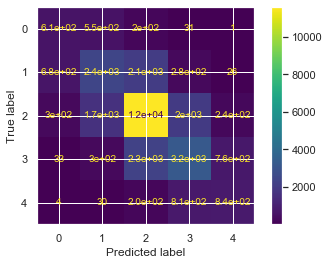

In [22]:
preds_mltnb = mltnb.predict(countvectr.transform(X_test))
print ("\nAccuracy on test sample: {:.2f}".format(accuracy_score(y_test, preds_mltnb)))
print("\nClassification report : \n",classification_report(y_test, preds_mltnb))
print("\nConfusion Matrix : \n",confusion_matrix(y_test, preds_mltnb))
print("\nConfusion Matrix : \n",plot_confusion_matrix(mltnb,countvectr.transform(X_test),y_test))

In [23]:
from sklearn.tree import DecisionTreeClassifier


Accuracy on test sample: 0.60

Classification report : 
               precision    recall  f1-score   support

           0       0.39      0.39      0.39      1391
           1       0.49      0.46      0.47      5497
           2       0.70      0.75      0.72     15795
           3       0.51      0.48      0.49      6638
           4       0.47      0.38      0.42      1891

    accuracy                           0.60     31212
   macro avg       0.51      0.49      0.50     31212
weighted avg       0.59      0.60      0.60     31212


Confusion Matrix : 
 [[  541   585   211    38    16]
 [  619  2532  2066   256    24]
 [  176  1784 11826  1883   126]
 [   28   258  2539  3155   658]
 [    6    38   242   888   717]]

Confusion Matrix : 


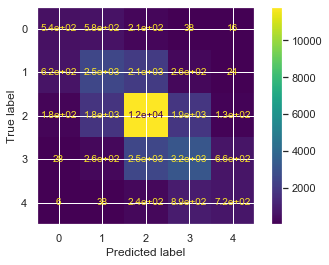

In [24]:
# Decision Tree Classifier
dtree =DecisionTreeClassifier()
dtree.fit(Total_counts_X, y_train)
preds_dtree = dtree.predict(countvectr.transform(X_test))
print ("\nAccuracy on test sample: {:.2f}".format(accuracy_score(y_test, preds_dtree)))
print("\nClassification report : \n",classification_report(y_test, preds_dtree))
print("\nConfusion Matrix : \n",confusion_matrix(y_test, preds_dtree))
print("\nConfusion Matrix : \n",plot_confusion_matrix(dtree,countvectr.transform(X_test),y_test))

In [25]:
from sklearn.linear_model import LogisticRegression

C:\Users\Raja\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)



Accuracy on Test sample: 0.65

Classification report : 
               precision    recall  f1-score   support

           0       0.53      0.32      0.40      1391
           1       0.55      0.42      0.48      5497
           2       0.70      0.86      0.77     15795
           3       0.58      0.48      0.53      6638
           4       0.56      0.38      0.45      1891

    accuracy                           0.65     31212
   macro avg       0.58      0.49      0.53     31212
weighted avg       0.63      0.65      0.63     31212


Confusion Matrix : 
 [[  449   657   258    25     2]
 [  309  2291  2668   203    26]
 [   75   984 13533  1142    61]
 [   13   192  2766  3197   470]
 [    2    20   221   929   719]]

Confusion Matrix : 


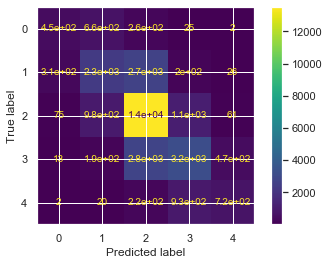

In [26]:
# Logistic Regression
lr = LogisticRegression(C=3)
lr.fit(Total_counts_X, y_train)
preds_lr = lr.predict(countvectr.transform(X_test))
print ("\nAccuracy on Test sample: {:.2f}".format(accuracy_score(y_test, preds_lr)))
print("\nClassification report : \n",classification_report(y_test, preds_lr))
print("\nConfusion Matrix : \n",confusion_matrix(y_test, preds_lr))
print("\nConfusion Matrix : \n",plot_confusion_matrix(lr,countvectr.transform(X_test),y_test))

In [27]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression

tvec = TfidfVectorizer()
clf2 = LogisticRegression(solver = "lbfgs")


from sklearn.pipeline import Pipeline

In [28]:
pipe = Pipeline([('vectorizer',tvec),('classifier',clf2)])

pipe.fit(X_train, y_train)

C:\Users\Raja\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


Pipeline(memory=None,
         steps=[('vectorizer',
                 TfidfVectorizer(analyzer='word', binary=False,
                                 decode_error='strict',
                                 dtype=<class 'numpy.float64'>,
                                 encoding='utf-8', input='content',
                                 lowercase=True, max_df=1.0, max_features=None,
                                 min_df=1, ngram_range=(1, 1), norm='l2',
                                 preprocessor=None, smooth_idf=True,
                                 stop_words=None, strip_accents=None,
                                 sublinear_tf=False,
                                 token_pattern='(?u)\\b\\w\\w+\\b',
                                 tokenizer=None, use_idf=True,
                                 vocabulary=None)),
                ('classifier',
                 LogisticRegression(C=1.0, class_weight=None, dual=False,
                                    fit_intercept=True, inter

In [29]:
preds_pipe = pipe.predict(X_test)

In [39]:
print ("\nAccuracy on Test sample: {:.2f}".format(accuracy_score(y_test, preds_pipe)))
print("\nClassification report : \n",classification_report(y_test, preds_pipe))
print("\nConfusion Matrix : \n",confusion_matrix(y_test, preds_pipe))
print("\nConfusion Matrix : \n",plot_confusion_matrix(lr,preds_pipe,y_test))


Accuracy on Test sample: 0.63

Classification report : 
                    precision    recall  f1-score   support

         negative       0.58      0.22      0.32      1391
          neutral       0.67      0.87      0.76     15795
         positive       0.59      0.24      0.35      1891
somewhat negative       0.54      0.37      0.44      5497
somewhat positive       0.57      0.47      0.52      6638

         accuracy                           0.63     31212
        macro avg       0.59      0.44      0.48     31212
     weighted avg       0.62      0.63      0.61     31212


Confusion Matrix : 
 [[  305   380     1   671    34]
 [   38 13756    40   891  1070]
 [    0   306   463    27  1095]
 [  179  3059    13  2035   211]
 [    7  3047   264   172  3148]]


ValueError: could not convert string to float: 'neutral'

In [30]:
import pickle as pkl
pkl.dump(countvectr, open ('phrase_countvectr.pkl', 'wb'))

In [31]:
pkl.dump(lr, open ('sentiment_cntVct_model_lr.pkl', 'wb'))

In [32]:
pkl.dump(pipe, open ('model_pipe.pkl', 'wb'))